In [1]:
import sklearn; 
print(sklearn.__version__)

0.19.1


C:\Users\larsw\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

### Question 1

In [3]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
student_data = pd.read_csv(data_path, delimiter = ',')

In [4]:
student_data.head(5)

,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974


In [5]:
student_data.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


In [6]:
len(student_data)

50

In [7]:
X = student_data.drop(columns="exam_score")
Phi = np.c_[np.ones((len(X), 1)), X]
y = student_data["exam_score"]

In [8]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(fit_intercept=False)
lreg.fit(Phi, y)
lreg.coef_

array([17.89768026,  1.44114091])

In [9]:
print(17.8977 + 10*1.4411)
lreg.predict(np.array([1, 10]).reshape(1,-1))

32.3087


array([32.30908931])

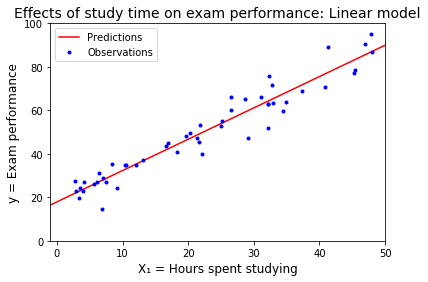

In [87]:
X_coords = np.linspace(-1, 50)
Phi_coords = np.c_[np.ones((len(X_coords), 1)), X_coords]
pred, = plt.plot(X_coords, lreg.predict(Phi_coords), "r-")
obs, = plt.plot(X, y, "b.")
obs.set_label("Observations")
pred.set_label("Predictions")
plt.legend()
plt.axis([-1, 50, 0, 100])
plt.xlabel("X\N{SUBSCRIPT ONE} = Hours spent studying", fontsize=12)
plt.ylabel("y = Exam performance", fontsize=12)
plt.title("Effects of study time on exam performance: Linear model", fontsize=14)
plt.show()

In [88]:
# Phi is our nx2 design matrix, y our nx1 target vector
gramian_matrix_of_phi = np.dot(Phi.T, Phi)
inverse_of_gramian    = np.linalg.inv(gramian_matrix_of_phi)
pseudo_inverse_of_phi = np.dot(inverse_of_gramian, Phi.T)
estimated_weights     = np.dot(pseudo_inverse_of_phi, y)
estimated_weights

array([17.89768026,  1.44114091])

In [89]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, lreg.predict(Phi))

30.9854726145413

In [90]:
def mse(Phi, weights):
    squared_error_sum = 0
    for i in range(len(Phi)):
        yi_pred = sum(Phi[i] * weights)
        squared_error_sum += (yi_pred - y[i])**2
    return 1/len(Phi) * squared_error_sum
mse(Phi, weights)

30.985472614541287

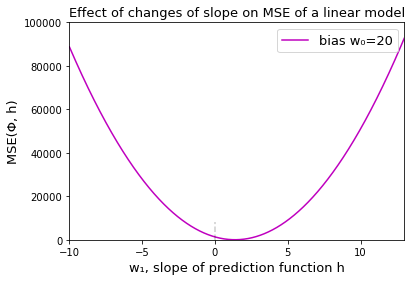

1.3723372337233712


In [117]:
w0 = 20
w1 = np.linspace(-10, 13, 10000)
error, = plt.plot(w1, [mse(Phi, [w0, w1[i]]) for i in range(10000)], "m-")
error.set_label("bias w\N{SUBSCRIPT ZERO}=20")
plt.plot([0, 0], [0, 8000], "k--", alpha=0.2)
plt.axis([-10, 13, 0, 100000])
plt.xlabel("w\N{SUBSCRIPT ONE}, slope of prediction function h", fontsize=13)
plt.ylabel("MSE(\N{GREEK CAPITAL LETTER PHI}, h)", fontsize=13)
plt.title("Effect of changes of slope on MSE of a linear model", fontsize=13)
plt.legend(fontsize=13)
plt.show()
print(w1[np.argmin([mse(Phi, [w0, w1[i]]) for i in range(10000)])])